In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict

# EDA

In [2]:
hour_df = pd.read_csv('hour.csv')
print("Shape of dataset::{}".format(hour_df.shape))

Shape of dataset::(17379, 17)


In [3]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
hour_df.rename(columns={'instant':'rec_id',
                        'dteday':'datetime',
                        'holiday':'is_holiday',
                        'workingday':'is_workingday',
                        'weathersit':'weather_condition',
                        'hum':'humidity',
                        'mnth':'month',
                        'cnt':'total_count',
                        'hr':'hour',
                        'yr':'year'},inplace=True)

In [6]:
# date time conversion
hour_df['datetime'] = pd.to_datetime(hour_df.datetime)

# categorical variables
hour_df['season'] = hour_df.season.astype('category')
hour_df['is_holiday'] = hour_df.is_holiday.astype('category')
hour_df['weekday'] = hour_df.weekday.astype('category')
hour_df['weather_condition'] = hour_df.weather_condition.astype('category')
hour_df['is_workingday'] = hour_df.is_workingday.astype('category')
hour_df['month'] = hour_df.month.astype('category')
hour_df['year'] = hour_df.year.astype('category')
hour_df['hour'] = hour_df.hour.astype('category')

In [7]:
hour_df.head()

,rec_id,datetime,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


[Text(0.5, 1.0, 'Season wise hourly distribution of counts')]

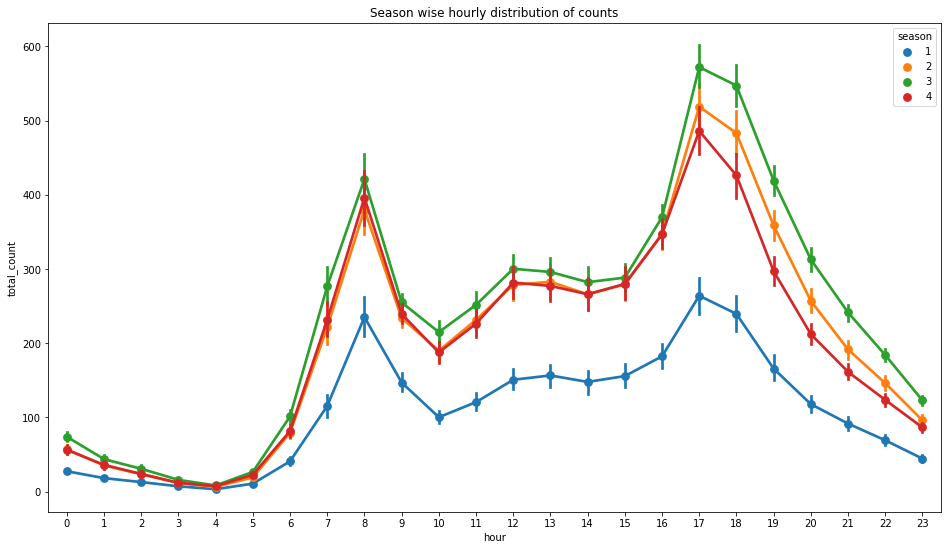

In [8]:
# seasonal trend
fig, ax = plt.subplots(figsize=(16, 9))
sns.pointplot(data=hour_df[['hour', 'total_count', 'season']],
              x='hour', y='total_count', hue='season', ax=ax)
ax.set(title="Season wise hourly distribution of counts")

[Text(0.5, 1.0, 'Week wise hourly distribution of counts')]

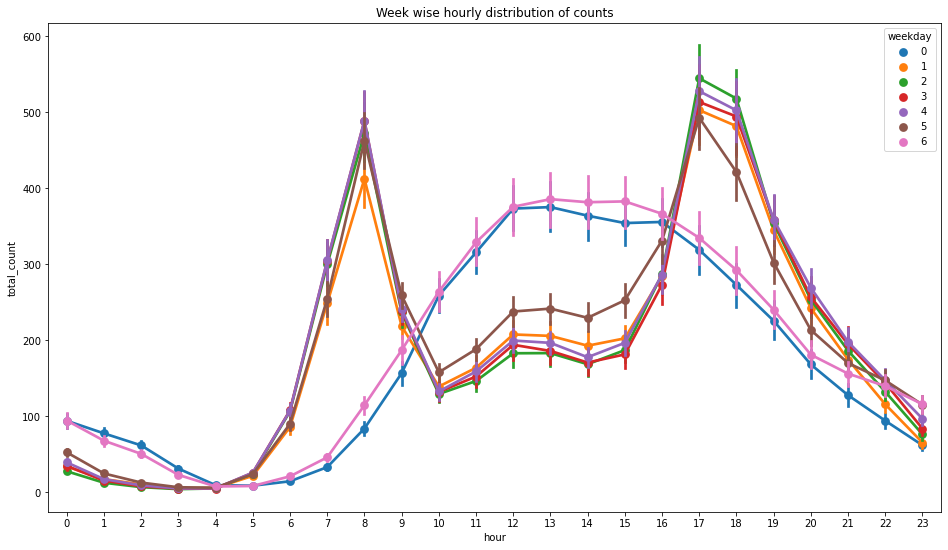

In [9]:
# week trend
fig, ax = plt.subplots(figsize=(16, 9))
sns.pointplot(data=hour_df[['hour', 'total_count', 'weekday']],
              x='hour', y='total_count', hue='weekday', ax=ax)
ax.set(title="Week wise hourly distribution of counts")

[Text(0.5, 1.0, 'Monthly distribution of counts')]

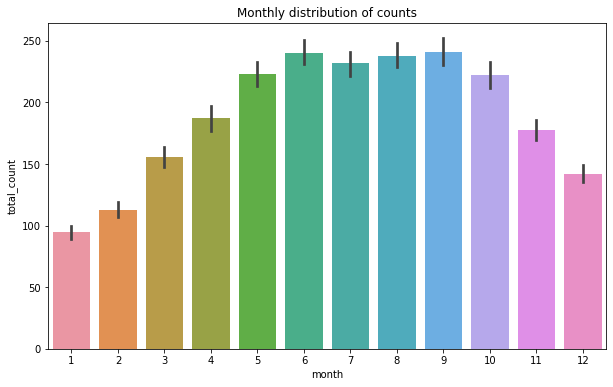

In [10]:
# month distribution
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=hour_df[['month', 'total_count']], x="month", y="total_count")
ax.set(title="Monthly distribution of counts")

<AxesSubplot:xlabel='year', ylabel='total_count'>

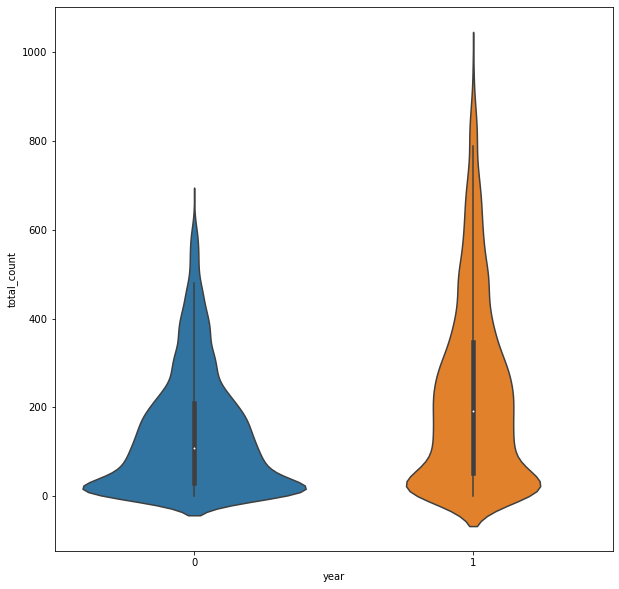

In [11]:
# yearly distributions with violin plots
fig, ax = plt.subplots(figsize=(10, 10))
sns.violinplot(data=hour_df[['year', 'total_count']],
               x="year", y="total_count")

<AxesSubplot:>

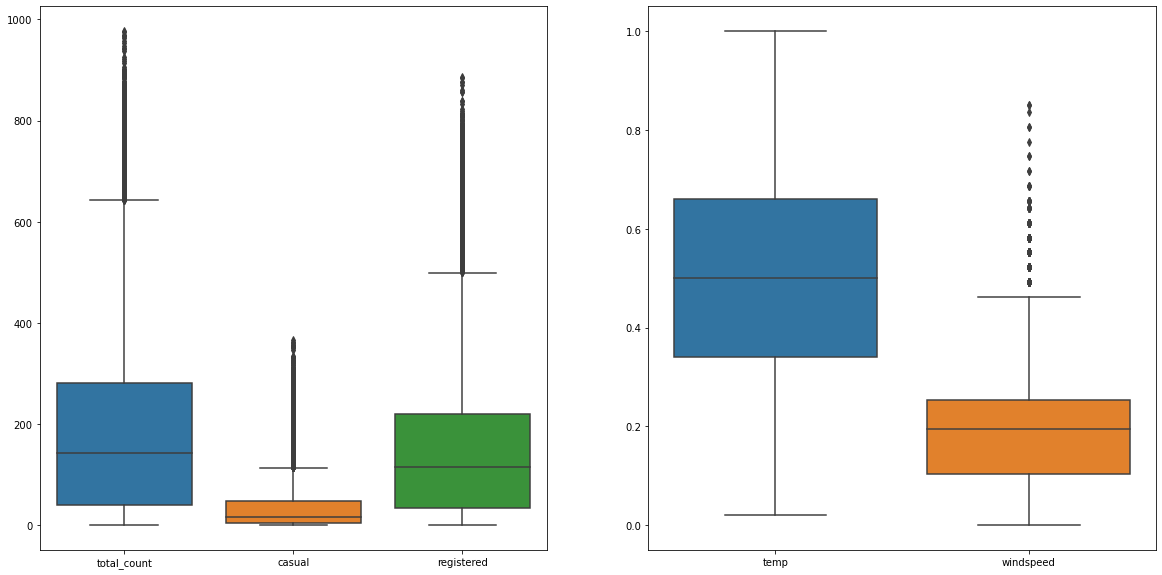

In [12]:
# checking for outliers
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 10))
sns.boxplot(data=hour_df[['total_count', 'casual', 'registered']], ax=ax1)
sns.boxplot(data=hour_df[['temp', 'windspeed']], ax=ax2)

[Text(0.5, 1.0, 'Box Pot for hourly distribution of counts')]

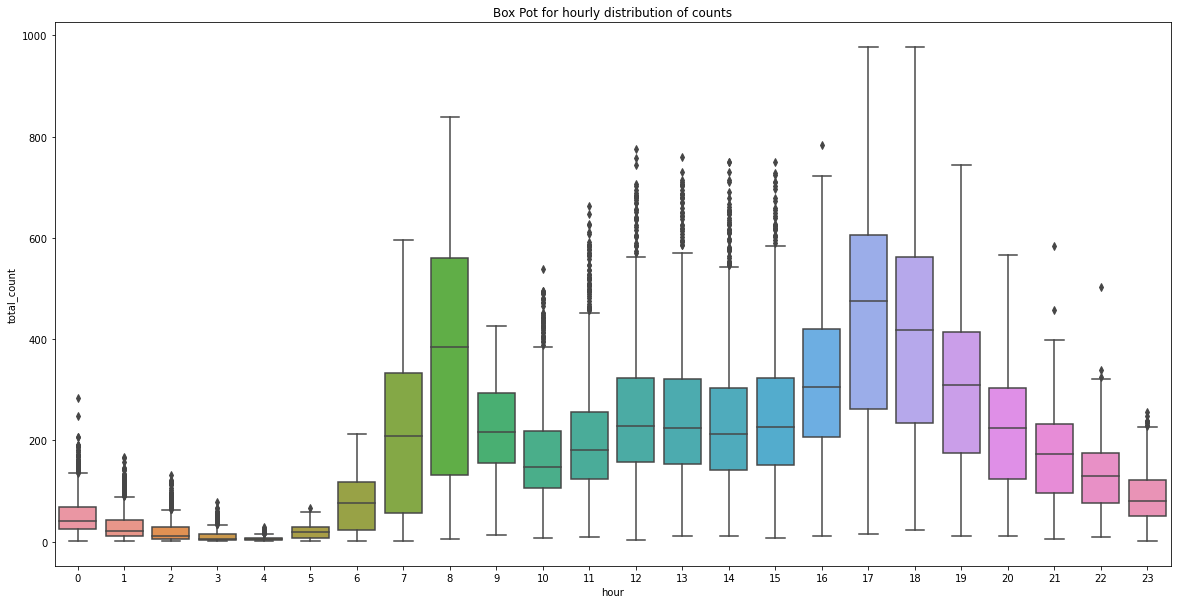

In [13]:
# checking for outliers
fig, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(data=hour_df[['hour', 'total_count']],
            x="hour", y="total_count", ax=ax)
ax.set(title="Box Pot for hourly distribution of counts")

<AxesSubplot:>

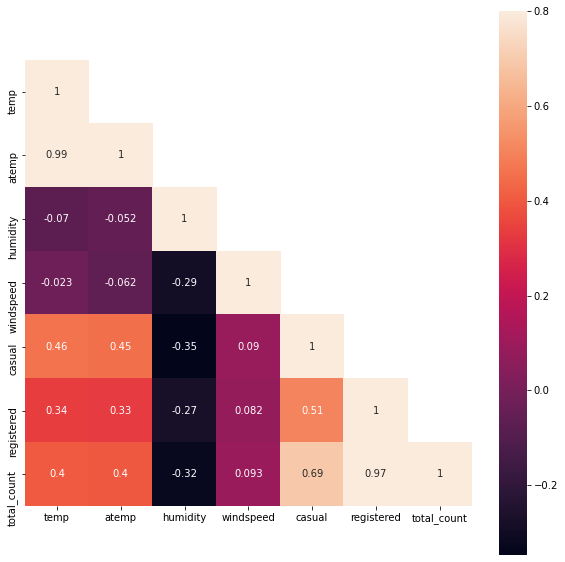

In [14]:
# correlations
fig, ax = plt.subplots(figsize=(10, 10))
corrMatt = hour_df[["temp", "atemp", "humidity",
                    "windspeed", "casual", "registered", "total_count"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(corrMatt, mask=mask, vmax=.8, square=True, annot=True)

# Preprocessing

In [15]:
# one hot encoding
def fit_transform_ohe(df, col_name):
    """This function performs one hot encoding for the specified column.
    Args:
        df(pandas.DataFrame): the data frame containing the mentioned column name
        col_name: the column to be one hot encoded
    Returns:
        tuple: label_encoder, one_hot_encoder, transformed column as pandas Series
    """
    # label encode the column
    le = preprocessing.LabelEncoder()
    le_labels = le.fit_transform(df[col_name])
    df[col_name + '_label'] = le_labels
    
    # one hot encoding
    ohe = preprocessing.OneHotEncoder()
    feature_arr = ohe.fit_transform(df[[col_name + '_label']]).toarray()
    feature_labels = [col_name + '_' + str(cls_label) for cls_label in le.classes_]
    features_df = pd.DataFrame(feature_arr, columns=feature_labels)
    return le, ohe, features_df

In [16]:
X, X_test, y, y_test = train_test_split(hour_df.iloc[:, 0:-3], hour_df.iloc[:, -1],
                                        test_size=0.33, random_state=42)

X.reset_index(inplace=True)
y = y.reset_index()

X_test.reset_index(inplace=True)
y_test = y_test.reset_index()

print("Training set::{}{}".format(X.shape, y.shape))
print("Testing set::{}".format(X_test.shape))

Training set::(11643, 15)(11643, 2)
Testing set::(5736, 15)


In [17]:
# feature processing
cat_attr_list = ['season','is_holiday',
                 'weather_condition','is_workingday',
                 'hour','weekday','month','year']
numeric_feature_cols = ['temp','humidity','windspeed','hour','weekday','month','year']
subset_cat_features =  ['season','is_holiday','weather_condition','is_workingday']

In [18]:
encoded_attr_list = []
for col in cat_attr_list:
    return_obj = fit_transform_ohe(X, col)
    encoded_attr_list.append({'label_enc': return_obj[0],
                              'ohe_enc': return_obj[1],
                              'feature_df': return_obj[2],
                              'col_name': col})

In [19]:
feature_df_list = [X[numeric_feature_cols]]
feature_df_list.extend([enc['feature_df']
                        for enc in encoded_attr_list
                        if enc['col_name'] in subset_cat_features])

train_df_new = pd.concat(feature_df_list, axis=1)
print("Shape::{}".format(train_df_new.shape))

Shape::(11643, 19)


In [20]:
hour_df.dtypes

rec_id                        int64
datetime             datetime64[ns]
season                     category
year                       category
month                      category
hour                       category
is_holiday                 category
weekday                    category
is_workingday              category
weather_condition          category
temp                        float64
atemp                       float64
humidity                    float64
windspeed                   float64
casual                        int64
registered                    int64
total_count                   int64
dtype: object

In [21]:
train_df_new.head()

,temp,humidity,windspeed,hour,weekday,month,year,season_1,season_2,season_3,season_4,is_holiday_0,is_holiday_1,weather_condition_1,weather_condition_2,weather_condition_3,weather_condition_4,is_workingday_0,is_workingday_1
0,0.64,0.65,0.1940,0,5,9,0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.50,0.45,0.2239,13,2,3,0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.86,0.47,0.5224,12,0,8,1,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.30,0.61,0.0000,2,3,2,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.54,0.19,0.4179,17,6,4,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


# Linear model

In [22]:
X = train_df_new
y = y.total_count.values.reshape(-1, 1)
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [23]:
predicted = cross_val_predict(lin_reg, X, y, cv=10)

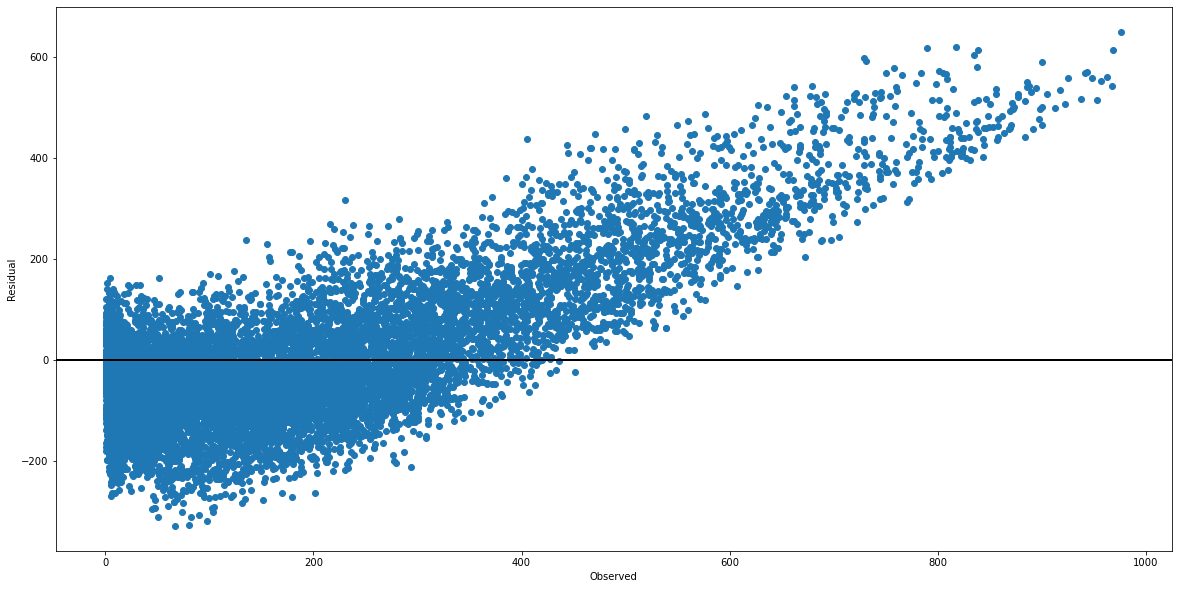

In [24]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(y, y-predicted)
ax.axhline(lw=2, color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()

In [26]:
# cross validation
r2_scores = cross_val_score(lin_reg, X, y, cv=10)
mse_scores = cross_val_score(lin_reg, X, y,
                             cv=10, scoring='neg_mean_squared_error')

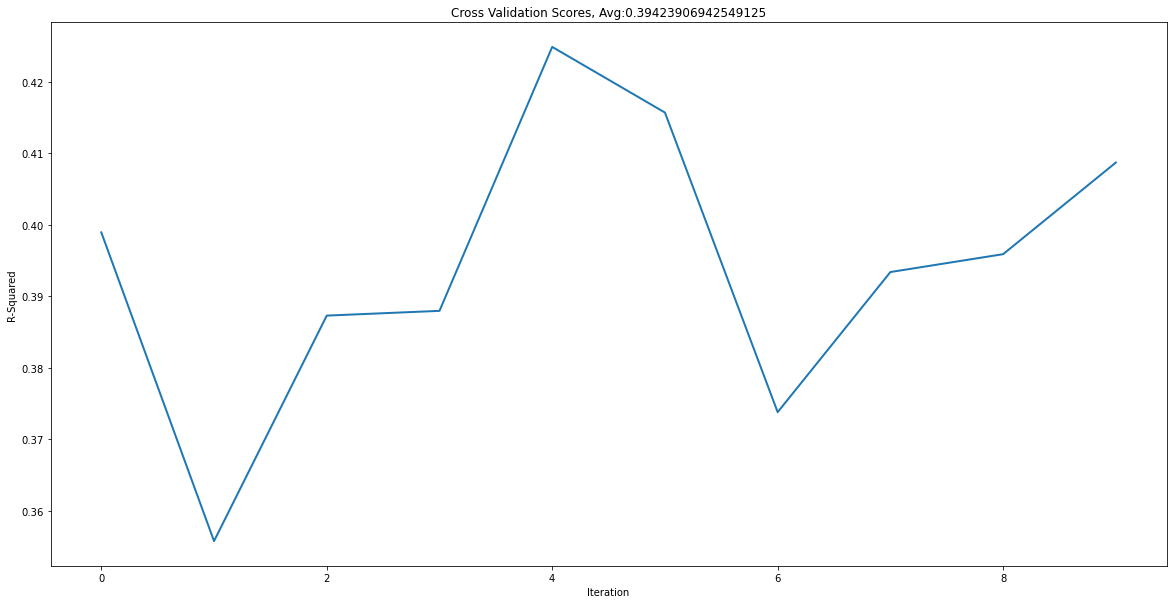

In [27]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot([i for i in range(len(r2_scores))], r2_scores, lw=2)
ax.set_xlabel('Iteration')
ax.set_ylabel('R-Squared')
ax.title.set_text(
    "Cross Validation Scores, Avg:{}".format(np.average(r2_scores)))
plt.show()

# Dataset Performance

In [28]:
# given label encoder and one hot encoder objects, 
# encode attribute to ohe
def transform_ohe(df,le,ohe,col_name):
    """This function performs one hot encoding for the specified
        column using the specified encoder objects.

    Args:
        df(pandas.DataFrame): the data frame containing the mentioned column name
        le(Label Encoder): the label encoder object used to fit label encoding
        ohe(One Hot Encoder): the onen hot encoder object used to fit one hot encoding
        col_name: the column to be one hot encoded

    Returns:
        tuple: transformed column as pandas Series

    """
    # label encode
    col_labels = le.transform(df[col_name])
    df[col_name+'_label'] = col_labels
    
    # ohe 
    feature_arr = ohe.fit_transform(df[[col_name+'_label']]).toarray()
    feature_labels = [col_name+'_'+str(cls_label) for cls_label in le.classes_]
    features_df = pd.DataFrame(feature_arr, columns=feature_labels)
    
    return features_df

In [29]:
# testing
test_encoded_attr_list = []
for enc in encoded_attr_list:
    col_name = enc['col_name']
    le = enc['label_enc']
    ohe = enc['ohe_enc']
    test_encoded_attr_list.append({'feature_df': transform_ohe(
        X_test, le, ohe, col_name), 'col_name': col_name})

test_feature_df_list = [X_test[numeric_feature_cols]]
test_feature_df_list.extend([enc['feature_df'] for enc in test_encoded_attr_list
                             if enc['col_name'] in subset_cat_features])

test_df_new = pd.concat(test_feature_df_list, axis=1)
print("Shape::{}".format(test_df_new.shape))

Shape::(5736, 19)


In [30]:
test_df_new.head()

,temp,humidity,windspeed,hour,weekday,month,year,season_1,season_2,season_3,season_4,is_holiday_0,is_holiday_1,weather_condition_1,weather_condition_2,weather_condition_3,weather_condition_4,is_workingday_0,is_workingday_1
0,0.80,0.27,0.1940,19,6,6,1,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.24,0.41,0.2239,20,1,1,1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.32,0.66,0.2836,2,5,10,0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.78,0.52,0.3582,19,2,5,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.26,0.56,0.3881,0,4,1,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [31]:
X_test = test_df_new
y_test = y_test.total_count.values.reshape(-1, 1)
y_pred = lin_reg.predict(X_test)
residuals = y_test - y_pred

In [32]:
r2_score = lin_reg.score(X_test, y_test)
print("R-squared::{}".format(r2_score))
print("MSE: %.2f" % mean_squared_error(y_test, y_pred))

R-squared::0.4024409682673429
MSE: 19063.00


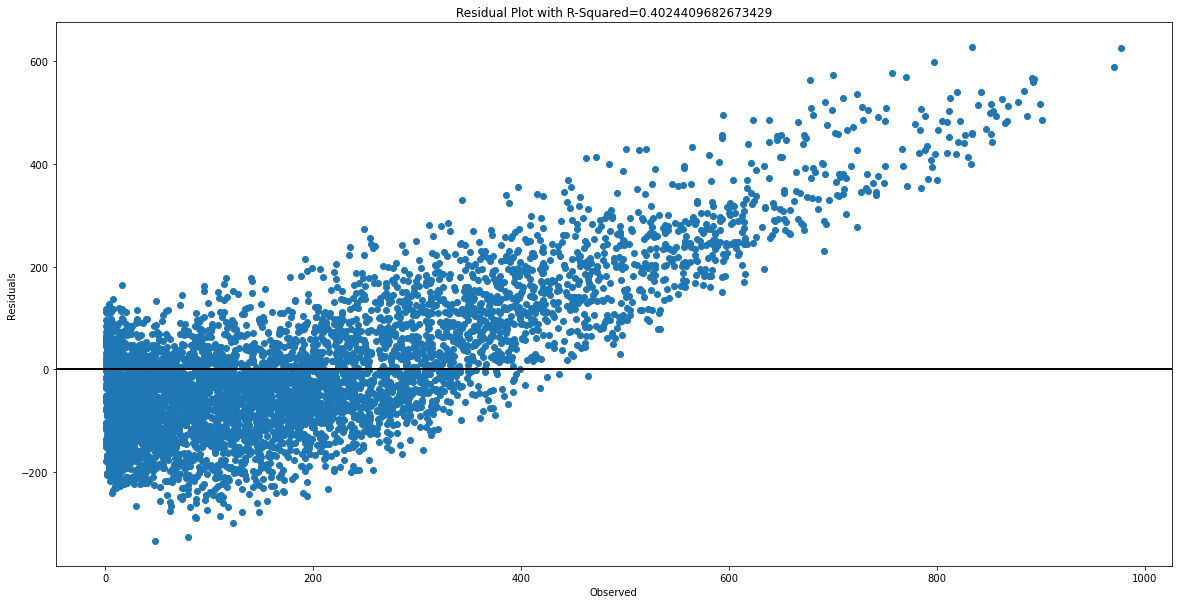

In [33]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(y_test, residuals)
ax.axhline(lw=2, color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residuals')
ax.title.set_text(
    "Residual Plot with R-Squared={}".format(np.average(r2_score)))
plt.show()